# Compare Xi_tilde being constant and function, check why being a function cannot reproduce solvent segragation in Wang 2022.

### $ D_{\text{e},\text{EC}}^0 = 2.5 \times 10^{-12} \ \text{m}^2/\text{s} $

In [22]:
# magic lines that avoid re-start
%load_ext autoreload
%autoreload 2
import pybamm;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp,sqrt;
import matplotlib as mpl; import sys  
fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing;import pandas as pd;
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
str_path_0 = os.path.abspath(os.path.join(pybamm.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip/Rio_Code/Fun_P3"))
sys.path.append(str_path_1) 
from Fun_P3 import *
BasicPath = os.path.expanduser("~/EnvPBGEM_ECDrag2/Double_SimSave/Double_Trans/")
Target  = 'Debug_Xi_tilde/' 
if not os.path.exists(BasicPath + Target):
   os.mkdir(BasicPath + Target)
Save_Fig = True

In [24]:
# define parameter of double and single 
Para_dict_Same = {
   "Mesh list":[ [10,5,10,80,20], ],    # Simon uses 30
   "Para_Set":[ "Li2023_ECdrag",],
   "Contact resistance [Ohm]":[12e-3],
   "Initial Neg SOC":[0.8841301667966484,],
   "Initial Pos SOC":[0.23552755074598045,],
}

Para_dict_DD_ONLY = {
   "Model option":[{
      "SEI": "constant",
      "SEI film resistance":"distributed",   
      "SEI porosity change": "true",
      "solvent diffusion": "double spatial consume w refill",
      "electrolyte conductivity": "sol full"  ,
     "contact resistance":"true",  },],
   "Lithium ion EC cross diffusivity [m2.s-1]":[ 2.5e-12], # 
   "EC transference number":["Fun_Xi_tidle","EC_transference_number_3"],
}
Para_dict_DD = {**Para_dict_Same,**Para_dict_DD_ONLY}
Para_DD = []
recursive_scan(Para_DD,Para_dict_DD, list(Para_dict_DD.keys()), {})
print(len(Para_DD),)

2


In [25]:
book_name_xlsx = 'Test.xlsx';sheet_name_xlsx = 'Results';
Path_Exp_Crate =  os.path.expanduser(
    "~/EnvPBGEM_ECDrag2/Double_SimSave/Double_Trans/Ruihe_newLGM50_Crate/")
Path_pack = [BasicPath,Target,Path_Exp_Crate,book_name_xlsx,sheet_name_xlsx,];

In [26]:
Rate_Dis_All = [1.0]; # np.arange(1,2.5+0.5,0.5) # np.arange(3.8,4.5+0.175,0.175)
print(Rate_Dis_All,len(Rate_Dis_All))

[1.0] 1


In [27]:
# Three set of solution:
str_pickle = "Xitilde_Fun"; Return_sol=True; Save_sol=True; 
DD_Xitilde_Fun_Crate = Scan_Crate_Paper(
    0.0, Para_DD[0], Path_pack , 
    "Xitilde_Fun",Rate_Dis_All,"Xitilde_Fun",
    Return_sol,Save_sol)
DD_Xitilde_3_Crate = Scan_Crate_Paper(
    1.0, Para_DD[1], Path_pack , 
    "Xitilde_3",Rate_Dis_All,"Xitilde_3",
    Return_sol,Save_sol)

Start Now! Scan 0.
Start Now! C rate: 1.0


CasADi - 2024-03-18 14:59:32 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated.
The same functionality is provided by providing additional input arguments to the 'integrator' function, in particular:
 * Call integrator(..., t0, tf, options) for a single output time, or
 * Call integrator(..., t0, grid, options) for multiple grid points.
The legacy 'output_t0' option can be emulated by including or excluding 't0' in 'grid'.
Backwards compatibility is provided in this release only.") [.../casadi/core/integrator.cpp:515]


Finish Xitilde_Fun_Rate=1.0C with Spent 34.176 s
Finish Xitilde_Fun - Scan=0.0
Start Now! Scan 1.
Start Now! C rate: 1.0
Finish Xitilde_3_Rate=1.0C with Spent 30.602 s
Finish Xitilde_3 - Scan=1.0


In [28]:
DD_Xitilde_Fun_Crate

{'Cap_Dis_All': [4.550025445296189],
 'Sol_All': [<pybamm.solvers.solution.Solution at 0x7f80a56750c0>],
 'Rate_Dis_All': [1.0],
 'Trise_All': [0.0],
 'Time_dis_All': [array([0.00000000e+00, 5.55555556e-04, 1.11111111e-03, ...,
         9.09444444e-01, 9.10000000e-01, 9.10005089e-01])],
 'Vol_dis_All': [array([4.04111745, 4.02822461, 4.02021148, ..., 2.5111688 , 2.50011302,
         2.50001   ])]}

In [29]:
# cyc based 
def Get_Vol_Component(DD_HDx_Crate):
    DD_HDx_Crate['Cyc Mean eta_c_e'] = []
    DD_HDx_Crate['Cyc Mean eta_c_EC'] = []
    DD_HDx_Crate['Cyc Mean eta_others'] = []
    DD_HDx_Crate['Cyc Mean eta_tot'] = []
    DD_HDx_Crate['Cyc Last eta_c_e'] = []
    DD_HDx_Crate['Cyc Last eta_c_EC'] = []
    DD_HDx_Crate['Cyc Last eta_others'] = []
    DD_HDx_Crate['Cyc Last eta_tot'] = []
    DD_HDx_Crate['Cyc Mean eta_c_e %'] = []
    DD_HDx_Crate['Cyc Mean eta_c_EC %'] = []
    DD_HDx_Crate['Cyc Mean eta_others %'] = []
    for sol in DD_HDx_Crate['Sol_All']:
        step_CD = sol.cycles[0].steps[1]
        ocv = step_CD["X-averaged battery open circuit voltage [V]"].entries
        eta_c_e = -step_CD[
            "X-averaged battery concentration overpotential [V]"].entries
        eta_c_EC = -step_CD[
            "X-averaged EC concentration overpotential [V]"].entries
        V = step_CD["Terminal voltage [V]"].entries
        eta_others = ocv - eta_c_e - eta_c_EC - V
        eta_tot = ocv - V
        mean_eta_c_e = np.mean(eta_c_e)
        mean_eta_c_EC = np.mean(eta_c_EC)
        mean_eta_others = np.mean(eta_others)
        mean_eta_c_tot = np.mean(eta_tot)
        DD_HDx_Crate['Cyc Mean eta_c_e'].append(np.mean(eta_c_e))
        DD_HDx_Crate['Cyc Mean eta_c_EC'].append(np.mean(eta_c_EC))
        DD_HDx_Crate['Cyc Mean eta_others'].append(np.mean(eta_others))
        DD_HDx_Crate['Cyc Mean eta_tot'].append(np.mean(eta_tot))
        DD_HDx_Crate['Cyc Last eta_c_e'].append(eta_c_e[-1])
        DD_HDx_Crate['Cyc Last eta_c_EC'].append(eta_c_EC[-1])
        DD_HDx_Crate['Cyc Last eta_others'].append(eta_others[-1])
        DD_HDx_Crate['Cyc Last eta_tot'].append(eta_tot[-1])
        DD_HDx_Crate['Cyc Mean eta_c_e %'].append(
            mean_eta_c_e/mean_eta_c_tot*100)
        DD_HDx_Crate['Cyc Mean eta_c_EC %'].append(
            mean_eta_c_EC/mean_eta_c_tot*100)
        DD_HDx_Crate['Cyc Mean eta_others %'].append(
            mean_eta_others/mean_eta_c_tot*100)
    return DD_HDx_Crate
DD_Xitilde_Fun_Crate = Get_Vol_Component(DD_Xitilde_Fun_Crate)
DD_Xitilde_3_Crate = Get_Vol_Component(DD_Xitilde_3_Crate)

In [30]:
# Fig. 3 - only overpotential, and three components:
def Plot_Voldecom_All(DD_HDx_Crate,Crate_index,Save_Fig):
    #Crate_index = -1
    Colors_a = [
        [31/255, 119/255, 180/255, 0.5], # like blue
        [44/255, 160/255, 44/255,  0.7], # like green  
        [214/255, 39/255, 40/255,  0.7], # like red
        [255/255, 127/255, 14/255, 0.9],]# like orange 
    Colors_b = [
        [31/255, 119/255, 180/255, 0.0], # like blue
        [44/255, 160/255, 44/255,  0.0], # like green  
        [214/255, 39/255, 40/255,  0.0], # like red
        [255/255, 127/255, 14/255, 0.0],]# like orange 
    sol_dd_HDx = DD_HDx_Crate['Sol_All'][Crate_index]
    step_CD = sol_dd_HDx.cycles[0].steps[1]
    time = step_CD["Time [s]"].entries - step_CD["Time [s]"].entries[0] # 
    zeros = 0*np.ones_like(time)
    ocv = step_CD["X-averaged battery open circuit voltage [V]"].entries
    Total_overpotential = ocv - step_CD["Terminal voltage [V]"].entries;
    eta_c_e = -step_CD["X-averaged battery concentration overpotential [V]"].entries
    eta_c_EC = -step_CD["X-averaged EC concentration overpotential [V]"].entries
    V = step_CD["Terminal voltage [V]"].entries
    eta_others = ocv - eta_c_e - eta_c_EC - V
    eta_tot = ocv - V

    fs = 12; font = {'family' : 'DejaVu Sans','size'   : fs}
    mpl.rc('font', **font)
    fig, ax = plt.subplots(figsize=(9/2.54,6/2.54),tight_layout=True)
    ax.plot(time, ocv, "k--", ) # label="Open-circuit voltage"
    ax.fill_between(time, ocv-eta_c_e, ocv, color=Colors_a[1], edgecolor=Colors_b[1], label=r"Li$^+$")
    #ax.plot(time, ocv-eta_c_e,  color=Colors_a[1], label=r"Li$^+$")
    ax.fill_between(time, ocv-eta_c_e-eta_c_EC, ocv-eta_c_e, color=Colors_a[3], edgecolor=Colors_b[3], label="EC")
    #ax.plot(time, ocv-eta_c_e-eta_c_EC, color=Colors_a[3],  label="EC")
    ax.fill_between(time, V, ocv-eta_c_e-eta_c_EC,  color=Colors_a[0],edgecolor=Colors_b[0],  label="Others")

    ax.plot(time, V, "k-", ) # label="Terminal voltage"

    leg = ax.legend(loc="lower left", bbox_to_anchor=(-0.01, -0.07),frameon=False)
    ax.set_xlim([time[0], time[-1]])
    ax.set_xlabel("Time / s")
    ax.set_ylabel("Voltage / V")
    #ax.set_ylabel(r"$\vec \nabla \cdot \vec N_\mathrm{diff}$") 
    ax.set_ylim([2.3,4.3])
    #plt.show() # it is this thing that make the save not good!!!
    if Save_Fig == True:
        plt.savefig(BasicPath + Target
            +f"{Rate_Dis_All[Crate_index]}C discharge voltage decomposition.png", 
            dpi=1000)
        plt.savefig(BasicPath + Target + 
            f'{Rate_Dis_All[Crate_index]}C discharge voltage decomposition.svg') 
    plt.close()
for i in range(len(Rate_Dis_All)):
    Plot_Voldecom_All(DD_Xitilde_Fun_Crate,i,Save_Fig)
    Plot_Voldecom_All(DD_Xitilde_3_Crate,i,  Save_Fig)

In [31]:
# plot EC concentraton change 
def Plot_Loc_Var_sol_10( 
        SD_Crate,Crate_index, str, x_loc_all, key_all,titles,YlimAll, 
        cycle, step,colormap,fs,Save_Fig): # for initial solution object
    font = {'family' : 'DejaVu Sans','size'   : fs}
    mpl.rc('font', **font)

    sol = SD_Crate['Sol_All'][Crate_index]

    #[key_Li,key_EC] = key_all
    Num_subplot = len(key_all[0]); # must have 2+ keys
    fig, axs = plt.subplots(2,Num_subplot, figsize=(30/2.53,12/2.54),tight_layout=True)

    for m in range(0,len(key_all)):
        keys = key_all[m]
        Ylim = YlimAll[m]
        for n in range(0,Num_subplot):
            x_loc=x_loc_all[n]; 
            key=keys[n]; 
            temp_L_Num= len(sol.cycles[cycle].steps[step][key].entries[0,:] )
            #print(f"Total line number is: {temp_L_Num}")
            if temp_L_Num > 26:
                xx = np.arange(0,temp_L_Num,int(np.rint(temp_L_Num/50)));
            else:
                xx = np.arange(0,temp_L_Num,1);
            xx = xx.tolist()
            if not xx[-1]==temp_L_Num-1:
                xx.append(temp_L_Num-1)
            cmap_i = mpl.cm.get_cmap(colormap, len(xx)) 
            for index_j,j in zip(  range(0,len(xx)), xx):
                len_1 = len(sol.cycles[cycle].steps[step][x_loc].entries[:,0])
                len_2 = len(sol.cycles[cycle].steps[step][key].entries[:,j])
                if len_1>len_2:
                    axs[m,n].plot(
                        sol.cycles[cycle].steps[step][x_loc].entries[0:len_2,0]*1e6, 
                        sol.cycles[cycle].steps[step][key].entries[:,j], '-',
                        color=cmap_i(index_j),)
                elif len_1<len_2:
                    axs[m,n].plot(
                        sol.cycles[cycle].steps[step][x_loc].entries[:,0]*1e6, 
                        sol.cycles[cycle].steps[step][key].entries[0:len_1,j], '-',
                        color=cmap_i(index_j),)
                else:    
                    axs[m,n].plot(
                        sol.cycles[cycle].steps[step][x_loc].entries[:,0]*1e6, 
                        sol.cycles[cycle].steps[step][key].entries[:,j], '-',
                        color=cmap_i(index_j),)
            Y_0p = np.arange(-1e8,1e8,5e7)
            axs[m,n].plot( 85.2 * np.ones_like(Y_0p),Y_0p,"k-",linewidth=0.5,)
            axs[m,n].plot((85.2+12 )* np.ones_like(Y_0p),Y_0p, "k-",linewidth=0.5,)
            axs[m,n].set_ylim(Ylim[n])
            axs[1,n].set_xlabel(r"x / $\mu$m",   fontdict={'family':'DejaVu Sans','size':fs})
            """ axs[m,n].ticklabel_format( 
            axis='y', style='sci',
            scilimits=[-1e-6,1e-6], useOffset=None, 
            useLocale=None, useMathText=True) """
            axs[m,n].tick_params(
                labelcolor='k', labelsize=fs, width=1) ; 
            labels = axs[m,n].get_xticklabels() + axs[m,n].get_yticklabels(); 
            [label.set_fontname('DejaVu Sans') for label in labels]
            axs[0,n].set_title(titles[n] ,   fontdict={'family':'DejaVu Sans','size':fs+1})
    axs[0,0].set_ylabel(r"c / mol/m$^{3}$")
    axs[1,0].set_ylabel(r"c / mol/m$^{3}$")
    axs[0,1].set_ylabel(r"$\partial(\epsilon c)$/$\partial$(t) / mol/m$^{3}$/s")
    axs[1,1].set_ylabel(r"$\partial(\epsilon c)$/$\partial$(t) / mol/m$^{3}$/s")
    if Save_Fig == True:
        plt.savefig(BasicPath + Target
            +f"{str}_{Rate_Dis_All[Crate_index]}C - c(Li+) and flux.png", 
            dpi=1000)
        plt.savefig(BasicPath + Target + 
            f'{str}_{Rate_Dis_All[Crate_index]}C - c(Li+) and flux.svg') 
    return 

In [52]:
# plot EC concentraton change 
def Plot_Loc_Var_sol_10_2( 
        SD_Crate,Crate_index, str, x_loc_all, key_all,titles,YlimAll, 
        cycle, step,colormap,fs,Save_Fig): # for initial solution object
    font = {'family' : 'DejaVu Sans','size'   : fs}
    mpl.rc('font', **font)

    sol = SD_Crate['Sol_All'][Crate_index]

    #[key_Li,key_EC] = key_all
    [titles_Li,titles_EC] = titles
    Num_subplot = len(key_all[0]); # must have 2+ keys
    fig, axs = plt.subplots(2,Num_subplot, figsize=(30/2.53,12/2.54),tight_layout=True)

    for m in range(0,len(key_all)):
        keys = key_all[m]
        Ylim = YlimAll[m]
        for n in range(0,Num_subplot):
            x_loc=x_loc_all[n]; 
            key=keys[n]; 
            temp_L_Num= len(sol.cycles[cycle].steps[step][key].entries[0,:] )
            #print(f"Total line number is: {temp_L_Num}")
            if temp_L_Num > 26:
                xx = np.arange(0,temp_L_Num,int(np.rint(temp_L_Num/50)));
            else:
                xx = np.arange(0,temp_L_Num,1);
            xx = xx.tolist()
            if not xx[-1]==temp_L_Num-1:
                xx.append(temp_L_Num-1)
            cmap_i = mpl.cm.get_cmap(colormap, len(xx)) 
            for index_j,j in zip(  range(0,len(xx)), xx):
                len_1 = len(sol.cycles[cycle].steps[step][x_loc].entries[:,0])
                len_2 = len(sol.cycles[cycle].steps[step][key].entries[:,j])
                if len_1>len_2:
                    axs[m,n].plot(
                        sol.cycles[cycle].steps[step][x_loc].entries[0:len_2,0]*1e6, 
                        sol.cycles[cycle].steps[step][key].entries[:,j], '-',
                        color=cmap_i(index_j),)
                elif len_1<len_2:
                    axs[m,n].plot(
                        sol.cycles[cycle].steps[step][x_loc].entries[:,0]*1e6, 
                        sol.cycles[cycle].steps[step][key].entries[0:len_1,j], '-',
                        color=cmap_i(index_j),)
                else:    
                    axs[m,n].plot(
                        sol.cycles[cycle].steps[step][x_loc].entries[:,0]*1e6, 
                        sol.cycles[cycle].steps[step][key].entries[:,j], '-',
                        color=cmap_i(index_j),)
            Y_0p = np.arange(-1e8,1e8,5e7)
            axs[m,n].plot( 85.2 * np.ones_like(Y_0p),Y_0p,"k-",linewidth=0.5,)
            axs[m,n].plot((85.2+12 )* np.ones_like(Y_0p),Y_0p, "k-",linewidth=0.5,)
            axs[m,n].set_ylim(Ylim[n])
            axs[1,n].set_xlabel(r"x / $\mu$m",   fontdict={'family':'DejaVu Sans','size':fs})
            """ axs[m,n].ticklabel_format( 
            axis='y', style='sci',
            scilimits=[-1e-6,1e-6], useOffset=None, 
            useLocale=None, useMathText=True) """
            axs[m,n].tick_params(
                labelcolor='k', labelsize=fs, width=1) ; 
            labels = axs[m,n].get_xticklabels() + axs[m,n].get_yticklabels(); 
            [label.set_fontname('DejaVu Sans') for label in labels]
            axs[0,n].set_title(titles_Li[n] ,   fontdict={'family':'DejaVu Sans','size':fs+1})
            axs[1,n].set_title(titles_EC[n] ,   fontdict={'family':'DejaVu Sans','size':fs+1})
    axs[0,0].set_ylabel(r"c / mol/m$^{3}$")
    axs[1,0].set_ylabel(r"c / mol/m$^{3}$")
    axs[0,1].set_ylabel(r"Dimensionless")
    axs[1,1].set_ylabel(r"Dimensionless")
    if Save_Fig == True:
        plt.savefig(BasicPath + Target
            +f"{str}_{Rate_Dis_All[Crate_index]}C - c(Li+) and flux.png", 
            dpi=1000)
        plt.savefig(BasicPath + Target + 
            f'{str}_{Rate_Dis_All[Crate_index]}C - c(Li+) and flux.svg') 
    return 

In [33]:
Save_Fig

True

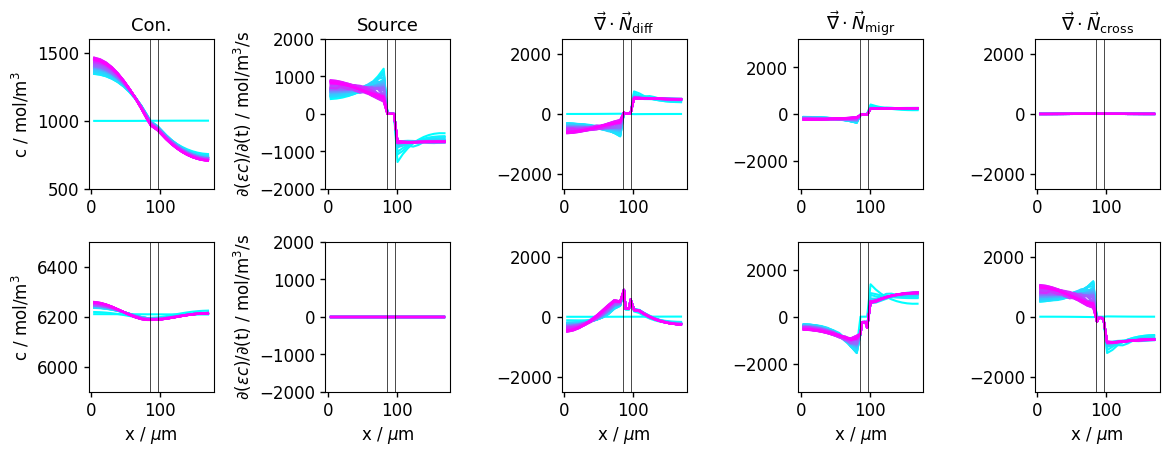

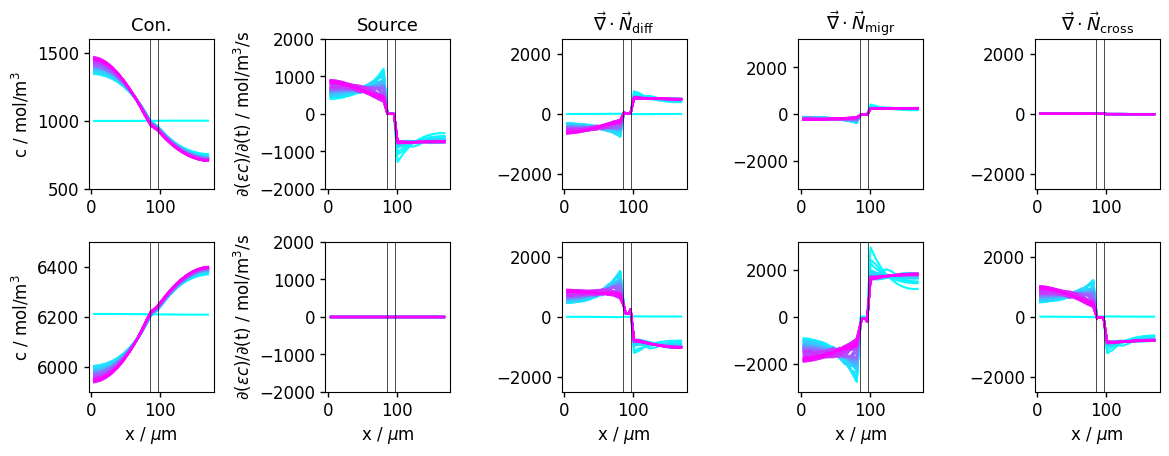

In [48]:
# Plot concentration flux and source - 4.5C high Dx
x_loc_all = ["x [m]"]*5
key_Li = [
    "Electrolyte concentration [mol.m-3]",
    "Li+ source term [mol.m-3.s-1]",
    #"y_e",
    "Minus div Li+ flux by diffusion [mol.m-3.s-1]",
    "Minus div Li+ flux by migration [mol.m-3.s-1]",
    "Minus div Li+ flux by solvent [mol.m-3.s-1]",
]
key_EC = [
    "EC concentration [mol.m-3]",
    "EC source term (SEI) [mol.m-3.s-1]",
    #"y_EC",
    "Minus div EC flux by diffusion [mol.m-3.s-1]",
    "Minus div EC flux by migration [mol.m-3.s-1]",
    "Minus div EC flux by Li+ [mol.m-3.s-1]",
]
titles = [
    "Con.",#r"Li$^+$",
    "Source",
    #"y",
    r"$\vec \nabla \cdot \vec N_\mathrm{diff}$",
    r"$\vec \nabla \cdot \vec N_\mathrm{migr}$",
    r"$\vec \nabla \cdot \vec N_\mathrm{cross}$"
]
key_all = [key_Li,key_EC];
YlimAll = [
    [[5e2,1.6e3],[-2e3,2e3],[-2.5e3,2.5e3],[-3.2e3,3.2e3],[-2.5e3,2.5e3]],
    [[5.9e3,6.5e3],[-2e3,2e3],[-2.5e3,2.5e3],[-3.2e3,3.2e3],[-2.5e3,2.5e3]]
]
for Crate_index in range(len(Rate_Dis_All)):
    Plot_Loc_Var_sol_10( 
        DD_Xitilde_Fun_Crate,Crate_index,"Xitilde_Fun",x_loc_all, 
        key_all,titles, YlimAll, 0, -1,"cool",12,Save_Fig)
    Plot_Loc_Var_sol_10( 
        DD_Xitilde_3_Crate,Crate_index,"Xitilde_3",x_loc_all, 
        key_all,titles, YlimAll, 0, -1,"cool",12,Save_Fig)
    

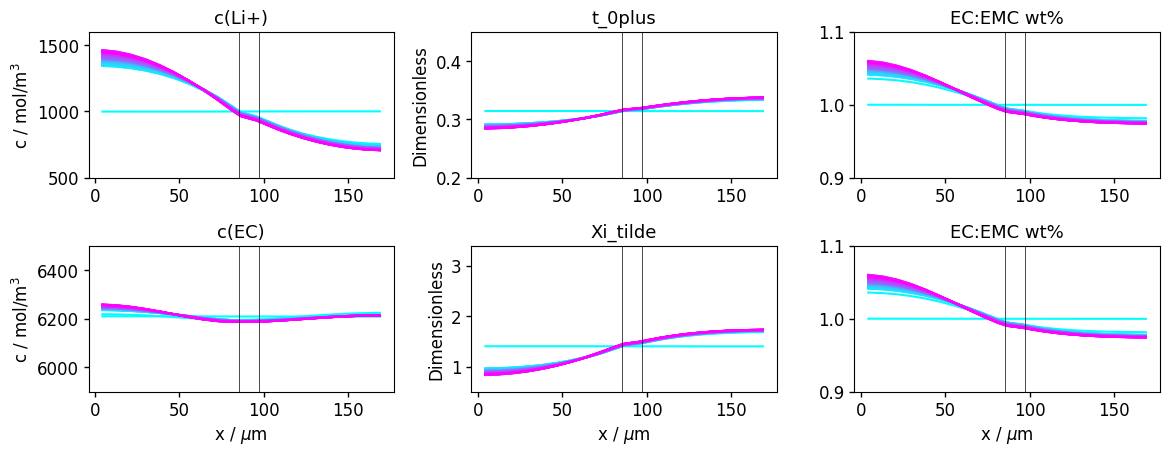

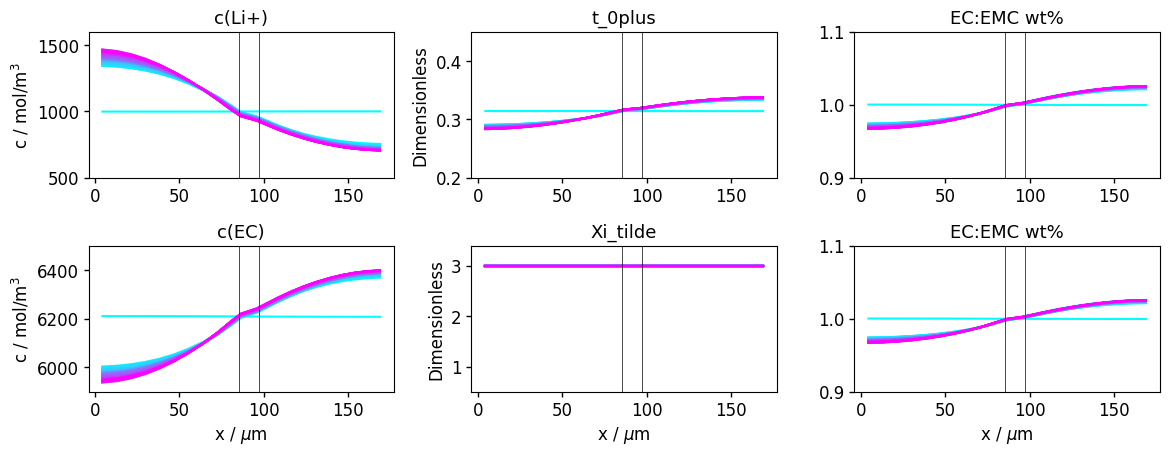

In [56]:
# check t_0plus and Xi_tilde
x_loc_all = ["x [m]"]*3
key_Li = [
    "Electrolyte concentration [mol.m-3]",
    "Cation transference number",
    "EC:EMC wt%",
]
key_EC = [
    "EC concentration [mol.m-3]",
    "EC transference number",
    "EC:EMC wt%",
]
titles_Li = ["c(Li+)","t_0plus","EC:EMC wt%",]
titles_EC = ["c(EC)","Xi_tilde","EC:EMC wt%",]
titles_all = [titles_Li,titles_EC]
key_all = [key_Li,key_EC];
YlimAll = [
    [[5e2,1.6e3],[0.2,0.45],[0.9,1.1],],
    [[5.9e3,6.5e3],[0.5,3.4],[0.9,1.1]]
]
for Crate_index in range(len(Rate_Dis_All)):
    Plot_Loc_Var_sol_10_2( 
        DD_Xitilde_Fun_Crate,Crate_index,"Xitilde_Fun",x_loc_all, 
        key_all,titles_all, YlimAll, 0, -1,"cool",12,Save_Fig=False)
    Plot_Loc_Var_sol_10_2( 
        DD_Xitilde_3_Crate,Crate_index,"Xitilde_3",x_loc_all, 
        key_all,titles_all, YlimAll, 0, -1,"cool",12,Save_Fig=False)
    

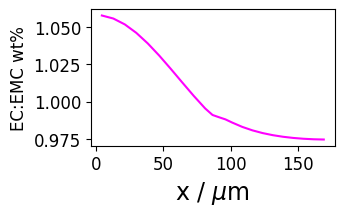

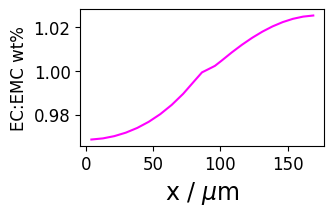

In [49]:
# Plot EC:DMC wt%
def Plot_EC_DMC_Crate(DD_HDx_Crate,Save_Fig):
    cm = mpl.cm.get_cmap("cool", len(DD_HDx_Crate['Sol_All'])) 

    Y_0p = np.arange(-1,10,0.1)
    fig, axs = plt.subplots( figsize=(8/2.54,4.5/2.54), ) #tight_layout=True
    for i,sol_Double_High in enumerate(DD_HDx_Crate['Sol_All']):
        step_i  =sol_Double_High.cycles[0].steps[1]
        t_i = (step_i['Time [s]'].entries-step_i['Time [s]'].entries[0]).tolist()
        x_Double_High =   step_i["x [m]"].entries[:,0]
        y_Double_High =   step_i["EC:EMC wt%"].entries[:,-1]
        axs.plot(x_Double_High*1e6, y_Double_High, 
                 color=cm(i),
                 label=r"Double-High D$_\times$") 

        axs.set_xlabel(r"x / $\mu$m",fontdict={'family':'DejaVu Sans','size':fs})
        #axs.set_title(Title_keys[i]) 
        axs.ticklabel_format( 
            axis='x', style='sci',
            scilimits=[-1e3,1e3], useOffset=None, 
            useLocale=None, useMathText=None)
    axs.set_ylabel("EC:EMC wt%")
    #axs.legend(prop={'family':'DejaVu Sans','size':fs-3},loc='best',frameon=False)  
    #axs[0].set_ylim([-0.1,4.1])
    #axs[1].set_ylim([1.7,4.8])
    #axs[2].set_ylim([5.5,7.6])
    # fig.suptitle(f"3C Discharge, t={round(t_select)} s", fontsize=fs+1)
    if Save_Fig == True:
        plt.savefig(BasicPath +  Target+ f"c.png", dpi=1000)
        plt.savefig(BasicPath +  Target+ f"EC:EMC wt%.svg")  

Plot_EC_DMC_Crate(DD_Xitilde_Fun_Crate,Save_Fig)
Plot_EC_DMC_Crate(DD_Xitilde_3_Crate,Save_Fig)


In [ ]:
# old version - 3C rate: to plot only c_EC and c_Li+
LS = ['-','--','-','--'];


Time selected is for 2.5C is 1080.5 and 1080.5,1080.5000000000002 s
Time selected is for 2.5C is 1080.5 and 1080.5,1080.5000000000002 s
Time selected is for 2.5C is 1080.5 and 1080.5,1080.5000000000002 s


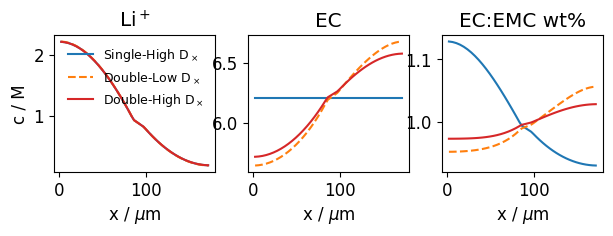

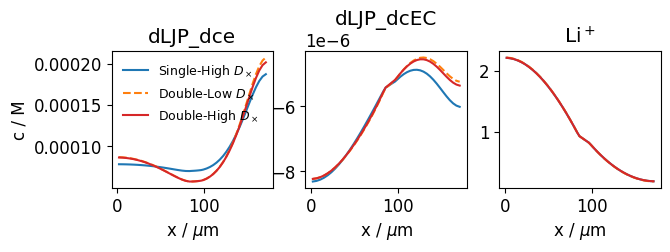

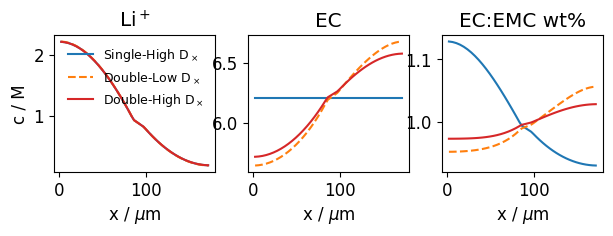

In [ ]:
# compare conccnetration
def Plot_Concentration_1_Crate(SD_Crate,DD_LDx_Crate,DD_HDx_Crate,
    x_loc,var_elely,Title_keys,Crate_index,Save_Fig):
    sol_Single_High =  SD_Crate['Sol_All'][Crate_index]
    time_Single_High = (sol_Single_High.cycles[0].steps[1]['Time [s]'].entries-sol_Single_High.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()
    sol_Double_High = DD_HDx_Crate['Sol_All'][Crate_index]
    time_Double_High = (sol_Double_High.cycles[0].steps[1]['Time [s]'].entries-sol_Double_High.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()
    sol_Double_Low = DD_LDx_Crate['Sol_All'][Crate_index]
    time_Double_Low = (sol_Double_Low.cycles[0].steps[1]['Time [s]'].entries-sol_Double_Low.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

    t_select = min(time_Single_High[-2],time_Double_High[-2],time_Double_Low[-2])
    i_Single_High = FindClose(time_Single_High,t_select)
    i_Double_High = FindClose(time_Double_High,t_select)

    i_Double_Low = FindClose(time_Double_Low,t_select)

    print(f'Time selected is for {Rate_Dis_All[Crate_index]}C is {time_Single_High[i_Single_High]} and {time_Double_High[i_Double_High]},{time_Double_Low[i_Double_Low]} s')
    Y_0p = np.arange(-1,10,0.1)
    fig, axs = plt.subplots(1,3, figsize=(18/2.54,4.5/2.54), ) #tight_layout=True
    for i in range(3):
        x_Single_High =   sol_Single_High.cycles[0].steps[1][x_loc[i]].entries[:,0]
        y_Single_High =   sol_Single_High.cycles[0].steps[1][var_elely[i]].entries[:,i_Single_High]

        x_Double_High =   sol_Double_High.cycles[0].steps[1][x_loc[i]].entries[:,0]
        y_Double_High =   sol_Double_High.cycles[0].steps[1][var_elely[i]].entries[:,i_Double_High]
        x_Double_Low =   sol_Double_Low.cycles[0].steps[1][x_loc[i]].entries[:,0]
        y_Double_Low =   sol_Double_Low.cycles[0].steps[1][var_elely[i]].entries[:,i_Double_Low]
        if var_elely[i].__contains__("[mol.m-3]"): 
            axs[i].plot(x_Single_High*1e6, y_Single_High/1e3, color=Colors[0],linestyle=LS[0],label=r"Single-High D$_\times$") 
            axs[i].plot(x_Double_Low*1e6, y_Double_Low/1e3, color=Colors[1],linestyle=LS[1],label=r"Double-Low D$_\times$") 
            axs[i].plot(x_Double_High*1e6, y_Double_High/1e3, color=Colors[2],linestyle=LS[0],label=r"Double-High D$_\times$") 
            #axs[i].plot( 85.2 * np.ones_like(Y_0p),Y_0p,"k-",linewidth=0.5,)
            #axs[i].plot((85.2+12 )* np.ones_like(Y_0p),Y_0p, "k-",linewidth=0.5,)
        else:
            axs[i].plot(x_Single_High*1e6, y_Single_High, color=Colors[0],linestyle=LS[0],label=r"Single-High $D_\times$") 
            axs[i].plot(x_Double_Low*1e6, y_Double_Low, color=Colors[1],linestyle=LS[1],label=r"Double-Low $D_\times$") 
            axs[i].plot(x_Double_High*1e6, y_Double_High, color=Colors[2],linestyle=LS[0],label=r"Double-High $D_\times$") 

        axs[i].set_xlabel(r"x / $\mu$m",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[i].set_title(Title_keys[i]) 
        axs[i].ticklabel_format( 
            axis='x', style='sci',
            scilimits=[-1e3,1e3], useOffset=None, 
            useLocale=None, useMathText=None)
    axs[0].set_ylabel("c / M")
    axs[0].legend(prop={'family':'DejaVu Sans','size':fs-3},loc='best',frameon=False)  
    #axs[0].set_ylim([-0.1,4.1])
    #axs[1].set_ylim([1.7,4.8])
    #axs[2].set_ylim([5.5,7.6])
    # fig.suptitle(f"3C Discharge, t={round(t_select)} s", fontsize=fs+1)
    if Save_Fig == True:
        plt.savefig(BasicPath +  Target+ 
            f"{Rate_Dis_All[Crate_index]}C Discharge, t={round(t_select)} s concentration profile.png", dpi=1000)
        plt.savefig(BasicPath +  Target+ 
            f"{Rate_Dis_All[Crate_index]}C Discharge, t={round(t_select)} s concentration profile.svg")  
x_loc = ["x [m]","x [m]","x [m]","x [m]","x [m]","x [m]"]
var_elely = [
    "Electrolyte concentration [mol.m-3]",
    "EC concentration [mol.m-3]",
    "EC:EMC wt%",]  # "c(EMC) [mol.m-3]",] 
var_LJP = [
    "dLJP_dce",
    "dLJP_dcEC",
    "Electrolyte concentration [mol.m-3]",] 
Title_LJP = [
    "dLJP_dce",
    "dLJP_dcEC",
    r"Li$^+$",]
Title_keys = [
    r"Li$^+$",
    "EC",
    "EC:EMC wt%",]
Save_Fig = True; Crate_index = -1
Plot_Concentration_1_Crate(SD_Crate,DD_LDx_Crate,DD_HDx_Crate,
    x_loc,var_elely,Title_keys,Crate_index,Save_Fig)
Plot_Concentration_1_Crate(SD_Crate,DD_LDx_Crate,DD_HDx_Crate,
    x_loc,var_LJP,Title_LJP,Crate_index,Save_Fig)
Plot_Concentration_1_Crate(SD_Crate,DD_LDx_Crate,DD_HDx_Crate,
    x_loc,var_elely,Title_keys,Crate_index,Save_Fig)

Time selected is for 1.0C is 3281.5 and 3281.5,3281.4999999999995 s
Time selected is for 1.5C is 2102.5000000000005 and 2102.4999999999995,2102.4999999999995 s
Time selected is for 2.0C is 1479.0 and 1479.0,1479.0 s
Time selected is for 2.5C is 1080.5 and 1080.5,1080.5000000000002 s


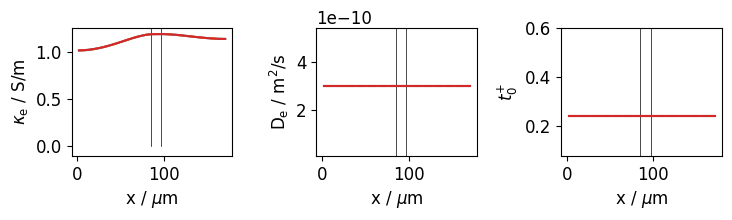

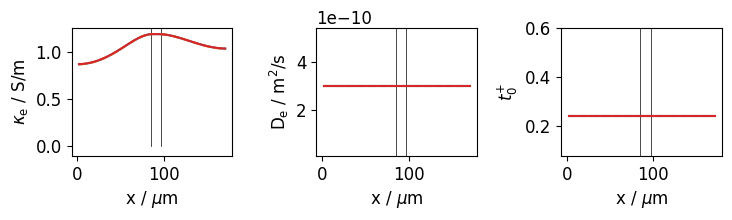

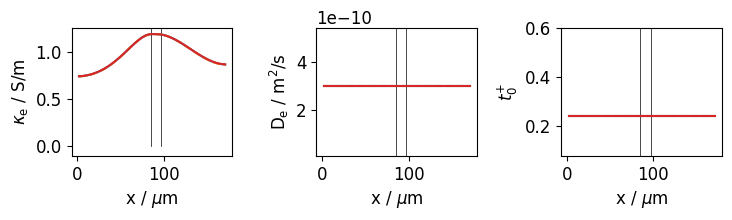

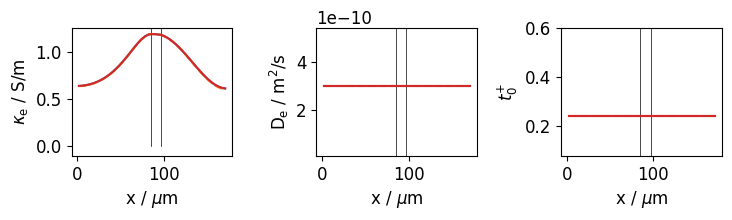

In [ ]:
# compare electrolyte properties
def Plot_EleyPro_1_Crate(SD_Crate,DD_LDx_Crate,DD_HDx_Crate,
    x_loc,var_elely,Title_keys,Crate_index,Ylim,Save_Fig):

    sol_Single_High =  SD_Crate['Sol_All'][Crate_index]
    time_Single_High = (sol_Single_High.cycles[0].steps[1]['Time [s]'].entries-sol_Single_High.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()
    sol_Double_High = DD_HDx_Crate['Sol_All'][Crate_index]
    time_Double_High = (sol_Double_High.cycles[0].steps[1]['Time [s]'].entries-sol_Double_High.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()
    sol_Double_Low = DD_LDx_Crate['Sol_All'][Crate_index]
    time_Double_Low = (sol_Double_Low.cycles[0].steps[1]['Time [s]'].entries-sol_Double_Low.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

    t_select = min(time_Single_High[-2],time_Double_High[-2],time_Double_Low[-2])
    i_Single_High = FindClose(time_Single_High,t_select)
    i_Double_High = FindClose(time_Double_High,t_select)

    i_Double_Low = FindClose(time_Double_Low,t_select)

    print(f'Time selected is for {Rate_Dis_All[Crate_index]}C is {time_Single_High[i_Single_High]} and {time_Double_High[i_Double_High]},{time_Double_Low[i_Double_Low]} s')
    
    Y_0p = np.arange(-1e-10,3,1e-1)
    fig, axs = plt.subplots(1,3, figsize=(19/2.54,6/2.54),tight_layout=True) # 
    for i in range(3):
        x_Single_High =   sol_Single_High.cycles[0].steps[1][x_loc[i]].entries[:,0]
        y_Single_High =   sol_Single_High.cycles[0].steps[1][var_elely[i]].entries[:,i_Single_High]

        x_Double_High =   sol_Double_High.cycles[0].steps[1][x_loc[i]].entries[:,0]
        y_Double_High =   sol_Double_High.cycles[0].steps[1][var_elely[i]].entries[:,i_Double_High]
        x_Double_Low =   sol_Double_Low.cycles[0].steps[1][x_loc[i]].entries[:,0]
        y_Double_Low =   sol_Double_Low.cycles[0].steps[1][var_elely[i]].entries[:,i_Double_Low]
        axs[i].plot( 85.2 * np.ones_like(Y_0p),Y_0p,"k-",linewidth=0.5,)
        axs[i].plot((85.2+12 )* np.ones_like(Y_0p),Y_0p, "k-",linewidth=0.5,)
        axs[i].plot(x_Single_High*1e6, y_Single_High, color=Colors[0],linestyle=LS[0],label=r"Single-High $D_\times$") 
        axs[i].plot(x_Double_Low*1e6, y_Double_Low, color=Colors[1],linestyle=LS[1],label=r"Double-Low $D_\times$") 
        axs[i].plot(x_Double_High*1e6, y_Double_High, color=Colors[2],linestyle=LS[0],label=r"Double-High $D_\times$") 
        axs[i].set_xlabel(r"x / $\mu$m",   fontdict={'family':'DejaVu Sans','size':fs})
        #axs[i].set_title(Title_keys[i]) 
        axs[i].ticklabel_format( 
            axis='x', style='sci',
            scilimits=[-1e3,1e3], useOffset=None, 
            useLocale=None, useMathText=None)
        axs[i].set_ylim(Ylim[i])
    axs[0].set_ylabel("$\kappa_\mathrm{e}$ / S/m")
    axs[1].set_ylabel("D$_\mathrm{e}$ / m$^\mathrm{2}$/s") # 
    axs[2].set_ylabel("$\mathit{t}_\mathrm{0}^\mathrm{+}$")
    """ axs[2].legend(prop={'family':'DejaVu Sans','size':fs-2},
    loc='best',ncol=1,  #bbox_to_anchor=(1, -0.00),
    frameon=False,markerscale=0.5,borderpad=0.0,
    handlelength=1.0,columnspacing=1) """
    if Save_Fig == True:
        plt.savefig(BasicPath +  Target+ 
            f"Fig_S2_{Rate_Dis_All[Crate_index]}C Discharge, t={round(t_select)} s electrolyte properties.png", dpi=1000)
        plt.savefig(BasicPath +  Target+ 
            f"Fig_S2_{Rate_Dis_All[Crate_index]}C Discharge, t={round(t_select)} s electrolyte properties.svg") 
x_loc = ["x [m]","x [m]","x [m]","x [m]","x [m]","x [m]"]
var_elely = [
    "Electrolyte conductivity [S.m-1]",
    "Electrolyte diffusivity [m2.s-1]",
    "Cation transference number",]
Title_keys = [
    r"Li$^+$",
    "EC",
    "EMC",]
fs = 12
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)
# Rate_Dis_All = [ 1, 1.75,2,2.25, 2.5, 3, 3.25, 3.5, 3.75, 4 ,4.2,4.4, 4.5 ];
Ylim = [ [-0.1,1.25] ,  [1e-11,5.4e-10] , [0.08,0.6] ] # for 4.5C
for i in range(len(Rate_Dis_All)):
    Plot_EleyPro_1_Crate(SD_Crate,DD_LDx_Crate,DD_HDx_Crate,
        x_loc,var_elely,Title_keys,Crate_index=i,Ylim=Ylim,Save_Fig=True)
#Plot_EleyPro_1_Crate(SD_Crate,DD_LDx_Crate,DD_HDx_Crate,x_loc,var_elely,Title_keys,Crate_index=0,Save_Fig)
